# Logistic Regression for Non-Linear Boundary
* Logistic Regression in also called as Linear classifier.
* In this we will check how good this linear classifier works for non-linear decision boundary 
* Also, Implemented the model that best suits for non-linear decision boundary problem of this kind 
* Performance measure for both the models will be carried out. 

In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd

### Dataset Explanation
In this part of the exercise, you will implement logistic regression (Non-Lniear Boundary)
to predict whether microchips from a fabrication plant passes quality assur-
ance (QA). During QA, each microchip goes through various tests to ensure
it is functioning correctly.
Suppose you are the product manager of the factory and you have the
test results for some microchips on two different tests. From these two tests,
you would like to determine whether the microchips should be accepted or
rejected. To help you make the decision, you have a dataset of test results
on past microchips, from which you can build a logistic regression model.

In [2]:
## Reading the Dataset ##
dataset = pd.read_csv("ex2data2.csv",header=None)
dataset.head()
# column 0 --> microchip 1
# column 1 --> microchip 2
# column 3 --> y{0,1}, 1--> passed the test and 0--> failed the test

,0,1,2
0,0.051267,0.69956,1
1,-0.092742,0.68494,1
2,-0.213710,0.69225,1
3,-0.375000,0.50219,1
4,-0.513250,0.46564,1


In [3]:
X = dataset.iloc[:,:2].values
y = dataset.iloc[:,-1].values
y = y.reshape(len(y),1)

## Visualizing the data

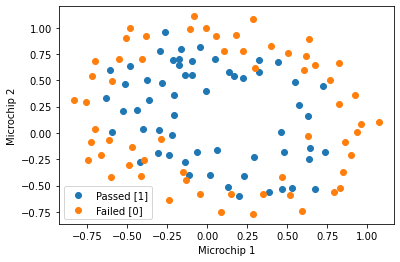

In [4]:
pos,neg = (np.where(y==1),np.where(y==0))
m1 = X[:,0] # microchip 1
m2 = X[:,1] # microchip 2 
plt.scatter(m1[pos[0]],m2[pos[0]], label="Passed [1]")
plt.scatter(m1[neg[0]],m2[neg[0]], label="Failed [0]")
plt.xlabel("Microchip 1")
plt.ylabel("Microchip 2")
plt.legend()
plt.show()

## Test/Train Split 

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42)


## Training the Data

In [6]:
from sklearn.linear_model import LogisticRegression
log_cls = LogisticRegression()
log_cls.fit(X_train,y_train)

/home/hari-cms/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


LogisticRegression()

## Training Accuracy 
* we will compute how good the model fit our training data 
* we do this by using predict function from our log_cls instance and pass in X_train as an argument and predict y_pred_train 
* we will use confusion matrix, precision, recall to find how good our model classified our data 

In [7]:
y_pred_train = log_cls.predict(X_train)

In [8]:
print(np.concatenate((y_train, y_pred_train.reshape(len(y_pred_train),1)), axis=1))

[[1 0]
 [1 0]
 [1 0]
 [0 0]
 [0 1]
 [1 0]
 [0 0]
 [1 1]
 [1 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 0]
 [1 1]
 [0 1]
 [0 0]
 [1 1]
 [1 1]
 [0 1]
 [1 1]
 [0 0]
 [0 0]
 [1 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 1]
 [1 0]
 [1 0]
 [0 1]
 [0 0]
 [1 0]
 [1 1]
 [0 1]
 [0 0]
 [1 0]
 [1 0]
 [1 0]
 [0 0]
 [1 1]
 [1 1]
 [1 0]
 [0 1]
 [1 1]
 [0 0]
 [0 0]
 [0 1]
 [1 1]
 [1 1]
 [0 1]
 [1 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 1]
 [1 0]
 [0 1]
 [1 0]
 [0 0]
 [1 0]
 [0 0]
 [1 1]
 [0 1]
 [0 1]
 [0 0]
 [0 0]
 [1 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 0]
 [0 0]
 [0 1]
 [0 1]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [1 1]
 [0 1]
 [0 0]
 [0 1]
 [1 0]
 [0 1]
 [1 1]
 [0 0]]


In [9]:
from sklearn.metrics import confusion_matrix,recall_score,precision_score
cm = confusion_matrix(y_train, y_pred_train)
cm

array([[28, 20],
       [21, 25]])

In [10]:
precision = precision_score(y_train, y_pred_train)
recall = recall_score(y_train, y_pred_train)
print("precision : {} , recall : {}".format(precision, recall))

precision : 0.5555555555555556 , recall : 0.5434782608695652


### Explanation of Logistic Regression being a Linear classifier
From the precision and recall score, we can easily say that logistic regression will never work properly for a non-linear data-set like this (refer the fig shown above). But, to use the same classifier for non-linear data-set, we can do feature mapping to some higher degree polynomial along with the regularisation concept, we can definitely improve the performance of the algorithm. Instead there is an algorithm **Support Vector Machine** which will work well with a non-linear data-set, we will use this algorithm and we will measure the performance of this algorithm

In [11]:
from sklearn.svm import SVC
svc = SVC(kernel='rbf') # we use rbf kernel for non-linear problems 
svc.fit(X_train,y_train)

/home/hari-cms/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


SVC()

In [12]:
y_pred = svc.predict(X_train)

In [13]:
print(np.concatenate((y_train, y_pred.reshape(len(y_pred),1)), axis=1))


[[1 1]
 [1 0]
 [1 1]
 [0 0]
 [0 1]
 [1 1]
 [0 0]
 [1 0]
 [1 1]
 [1 1]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [1 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 0]
 [1 1]
 [0 0]
 [0 0]
 [1 0]
 [1 1]
 [1 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 1]
 [1 1]
 [1 1]
 [1 0]
 [1 1]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [1 0]
 [0 1]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [1 1]
 [0 0]]


In [14]:
from sklearn.metrics import confusion_matrix,recall_score,precision_score
cm = confusion_matrix(y_train, y_pred)
precision = precision_score(y_train, y_pred)
recall = recall_score(y_train, y_pred)
print("precision : {} , recall : {}".format(precision, recall))

precision : 0.8888888888888888 , recall : 0.6956521739130435


In [15]:
cm

array([[44,  4],
       [14, 32]])

The score we obtained is pretty much better than training a logistic classifier. We can still enhance the performance by doing a **Feature Mapping**. And then with the new feature, we will use the SVM classifier and check if there is a perfomance enhancement. 
* Tutorial on Pipeline and its usecases - https://youtu.be/w9IGkBfOoic

In [16]:
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler

In [17]:
pipeline_svm = Pipeline([
                        ('poly_features',PolynomialFeatures(degree=6)),
                        ('scaler',StandardScaler()),
                        ('svm_cls',SVC(kernel='rbf'))
                        ])
pipeline_svm.fit(X_train,y_train)

/home/hari-cms/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


Pipeline(steps=[('poly_features', PolynomialFeatures(degree=6)),
                ('scaler', StandardScaler()), ('svm_cls', SVC())])

In [18]:
from sklearn.metrics import confusion_matrix,recall_score,precision_score
conf_matrix = confusion_matrix(y_train, pipeline_svm.predict(X_train).reshape(len(y_train),1))

In [19]:
conf_matrix

array([[36, 12],
       [ 5, 41]])

In [20]:
p_score = precision_score(y_train, pipeline_svm.predict(X_train).reshape(len(y_train),1))
rc_score = recall_score(y_train, pipeline_svm.predict(X_train).reshape(len(y_train),1))
print("precision : {} , recall : {}".format(p_score,rc_score))

precision : 0.7735849056603774 , recall : 0.8913043478260869


## Plotting Decision Boundary 


/home/hari-cms/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:18: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "papertype" which is no longer supported as of 3.3 and will become an error two minor releases later


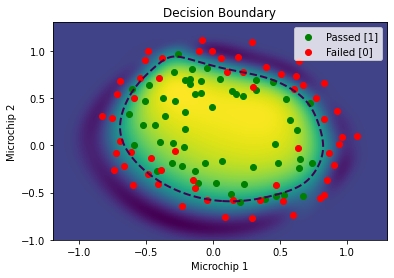

In [21]:
xx, yy = np.meshgrid(np.linspace(-1.2,1.3, 500),
                     np.linspace(-1,1.3, 500))
Z = pipeline_svm.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.imshow(Z, interpolation='nearest',
           extent=(xx.min(), xx.max(), yy.min(), yy.max()), aspect='auto',
           origin='lower', cmap='viridis')
contours = plt.contour(xx, yy, Z, levels=[0], linewidths=2,
                       linestyles='dashed')
plt.scatter(m1[pos[0]],m2[pos[0]], c='g',label="Passed [1]")
plt.scatter(m1[neg[0]],m2[neg[0]], c='r',label="Failed [0]")
plt.title("Decision Boundary")
plt.xlabel("Microchip 1")
plt.ylabel("Microchip 2")
plt.savefig('savefig.svg',dpi=None, facecolor='w', edgecolor='w',
        orientation='portrait', papertype=None, format=None,
        transparent=True,
        metadata=None)
plt.legend()
plt.show()